In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pylab as pl
from PIL import Image
import opendatasets

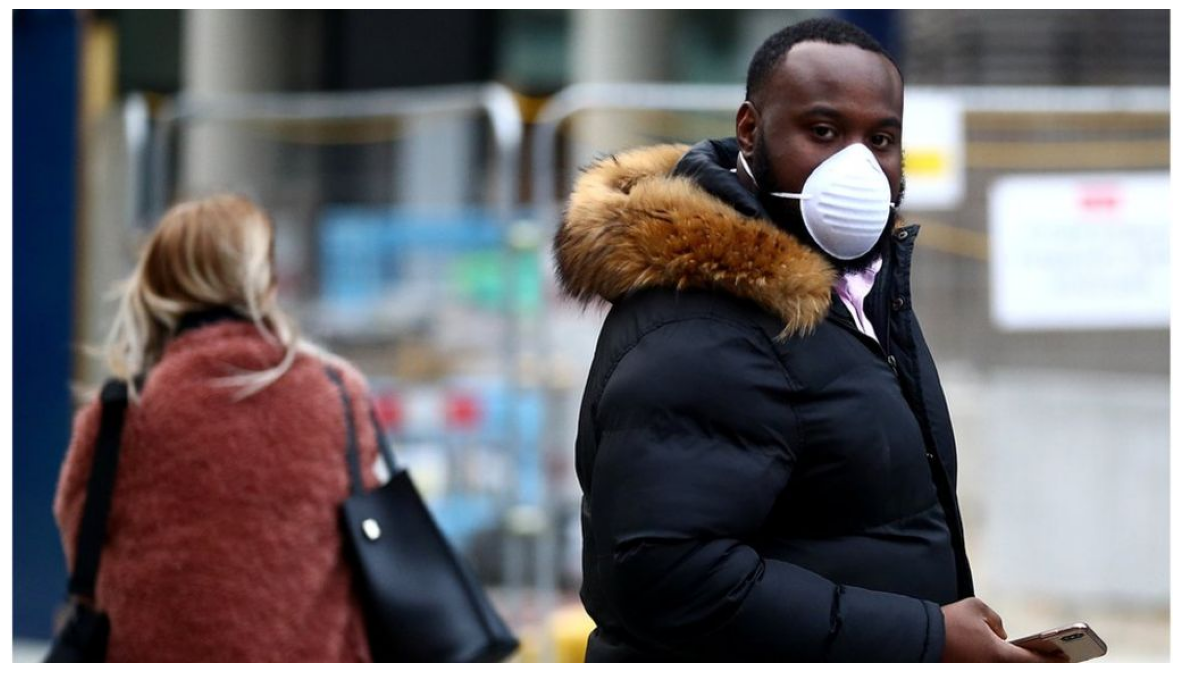

In [24]:
img0 = "images/train/_111510370_060683565.jpg"
_ = plt.figure(figsize = (15,20))
_ = plt.axis('off')
_ = plt.imshow(mpimg.imread(img0))

In [25]:
directory = 'images/train'

imagepath=[]
imagefile=[]
boxset=[]
boxfile=[]

for im in os.listdir(directory):
    if im[-5:]=='.jpeg':
        path=os.path.join(directory,im)
        imagepath+=[path]
        imagefile+=[im]
    elif im[-4:]=='.jpg':
        path=os.path.join(directory,im)
        imagepath+=[path]
        imagefile+=[im]
        
for im in imagefile:
    if im[-5:]=='.jpeg':
        bx=im[0:-5]+'.txt'
        path=os.path.join(directory,bx)
        bxdata=np.loadtxt(path)
        boxset+=[bxdata]
        boxfile+=[bx]
    elif im[-4:]=='.jpg':
        bx=im[0:-4]+'.txt'
        path=os.path.join(directory,bx)
        bxdata=np.loadtxt(path)
        boxset+=[bxdata]
        boxfile+=[bx]       

In [26]:
print(imagefile[0:5])
print(boxfile[0:5])

['-1x-1.jpg', '-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.jpeg', '0002526673.jpg', '0009S6815V3PEU1N-C123-F4.jpg', '000b7b75-1600.jpg']
['-1x-1.txt', '-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.txt', '0002526673.txt', '0009S6815V3PEU1N-C123-F4.txt', '000b7b75-1600.txt']


In [27]:
print(len(boxset))
print(len(imagepath))

692
692


In [74]:
def draw_bbox2(num0):
    
    img0=imagepath[num0]
    box0=boxset[num0]
    print(box0)
    print(img0)
    im = Image.open(img0)
    W,H = im.size
    print(im.size)  
    _ = plt.figure(figsize = (15,20))
    _ = plt.axis('on')
    _ = plt.imshow(mpimg.imread(img0))   
    ax = plt.gca()
    ax.text(W*0.02,H*0.05,f'MASK',fontsize=20,color='yellow')
    ax.text(W*0.02,H*0.09,f'NO MASK',fontsize=20,color='red')
    
    if type(box0[0])==int:
        mk,x0,y0,w0,h0 = box0
        x=(x0-w0/2)*W
        y=(y0-h0/2)*H
        w=w0*W
        h=h0*H
        if mk==1:
            rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='yellow',fill = False)
        elif mk==0:
            rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='red',fill = False)
        ax.add_patch(rect)
        print(rect)
        plt.show
    else:
        for item in box0:
            arr = np.array(item, dtype=np.float64)
            print(arr)
            mk,x0,y0,w0,h0 = arr
            print(mk,x0,y0,w0,h0)
            x=(x0-w0/2)*W
            y=(y0-h0/2)*H
            w=w0*W
            h=h0*H
            if mk==1:
                rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='yellow',fill = False)
            elif mk==0:
                rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='red',fill = False)            
            ax.add_patch(rect)
            plt.show

In [75]:
num0=0
for i in range(692):
    if imagepath[i]==img0:
        num0=i
        print(i)

[[1.         0.065      0.70139398 0.121      0.30374175]
 [0.         0.42225    0.06382979 0.0405     0.06603081]
 [1.         0.3205     0.0590609  0.058      0.06969919]
 [1.         0.0525     0.02017608 0.054      0.04035216]
 [1.         0.257      0.17278063 0.054      0.081438  ]
 [1.         0.3455     0.18451944 0.068      0.10051357]
 [0.         0.587      0.20689655 0.041      0.07043287]
 [0.         0.5495     0.26375642 0.06       0.08437271]
 [1.         0.68675    0.14269993 0.0565     0.09464417]
 [1.         0.8245     0.19589142 0.047      0.08070433]
 [1.         0.77525    0.47798973 0.0835     0.10491563]
 [1.         0.931      0.35399853 0.061      0.08290536]
 [1.         0.49475    0.41636097 0.0685     0.11225238]]
images/train\-1x-1.jpg
(2000, 1363)
[1.         0.065      0.70139398 0.121      0.30374175]
1.0 0.065 0.7013939838591343 0.121 0.3037417461482025
[0.         0.42225    0.06382979 0.0405     0.06603081]
0.0 0.42225 0.06382978723404256 0.0405 0.

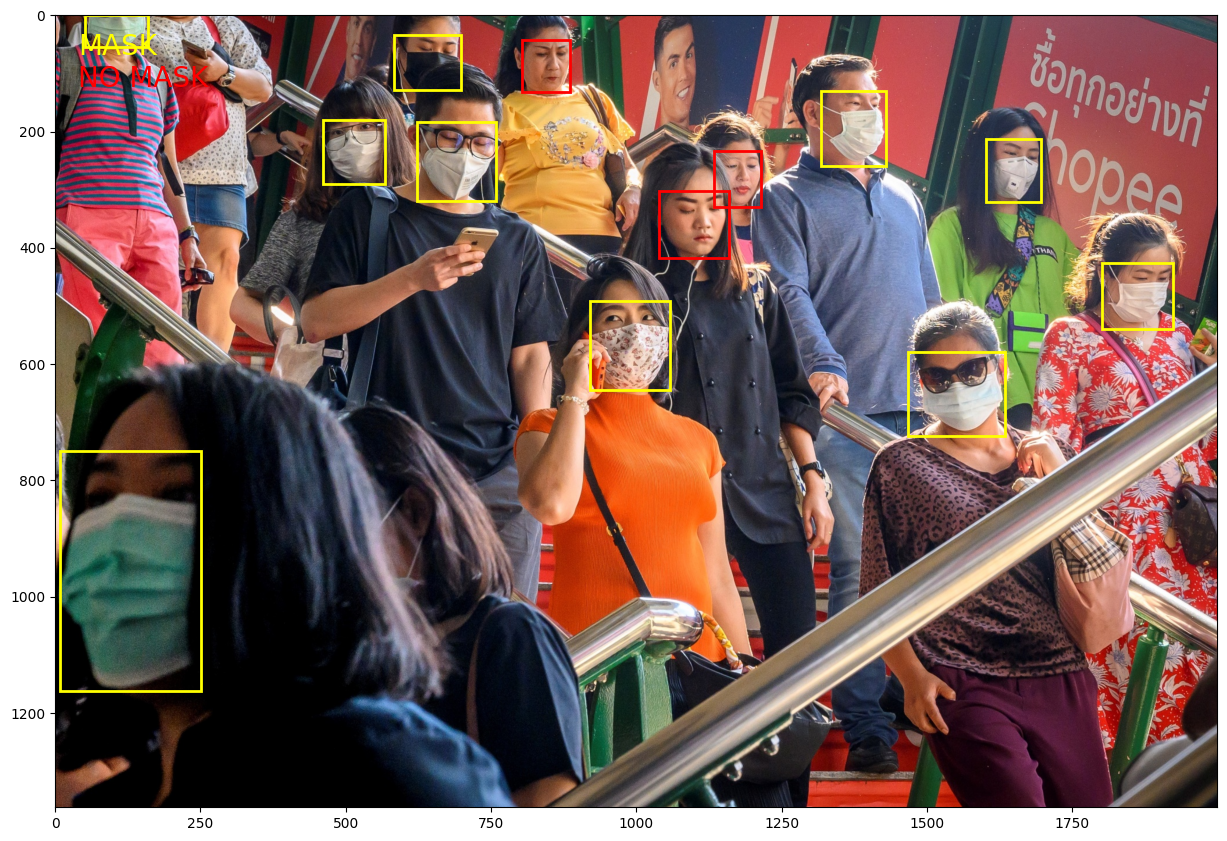

In [76]:
draw_bbox2(num0)

[1.         0.44140625 0.38975694 0.16015625 0.28993056]
images/train\004_1024.jpeg
(1024, 576)
1.0


TypeError: iteration over a 0-d array

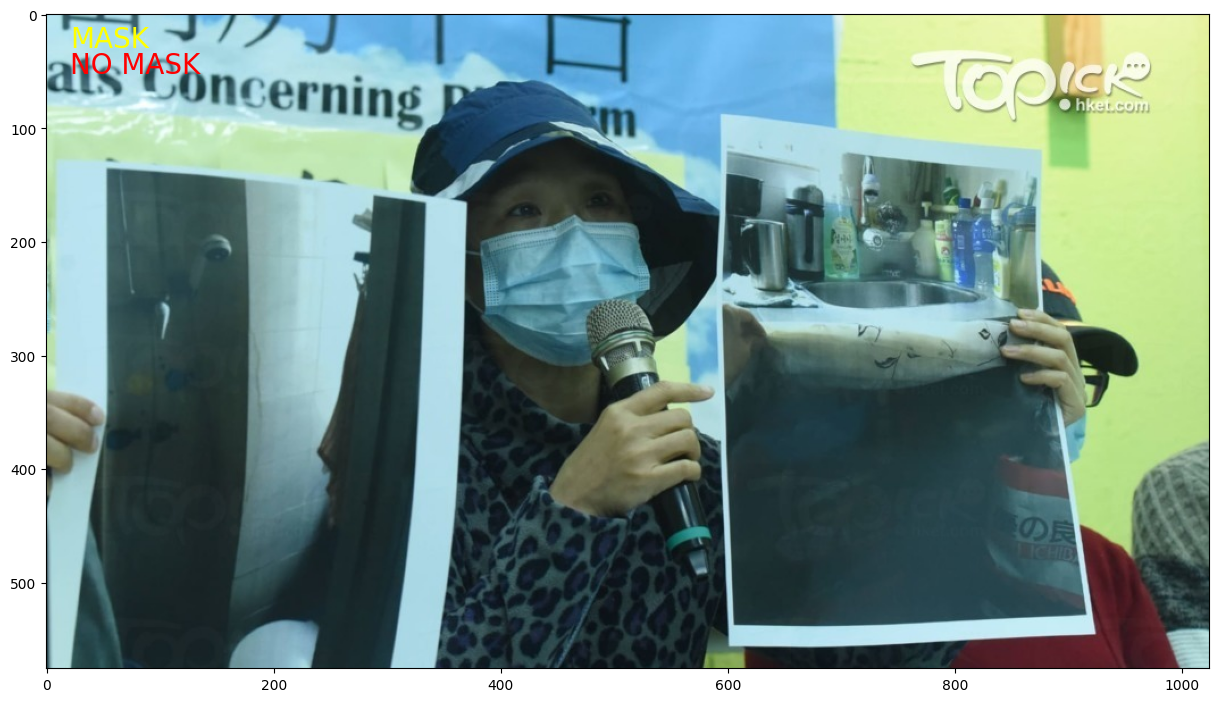

In [77]:
draw_bbox2(10)